In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1842,2020-10-03,United Kingdom,465629.0,467146.0,42285.0,42268.0,-1517.0,17.0
1843,2020-10-03,Germany,296485.0,296958.0,9523.0,9527.0,-473.0,-4.0
1844,2020-10-03,Iran,463963.0,464596.0,26588.0,26567.0,-633.0,21.0
1845,2020-10-03,Turkey,321217.0,321512.0,8316.0,8325.0,-295.0,-9.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11758.094206821874
RMSE =  42128.82001349303


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  319.6545749864645
RMSE =  806.7986232067018


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  87171.72988505747
RMSE =  133485.97292145478
-- World performances for deaths --
MAE =  1928.7011494252874
RMSE =  2346.5976691136584


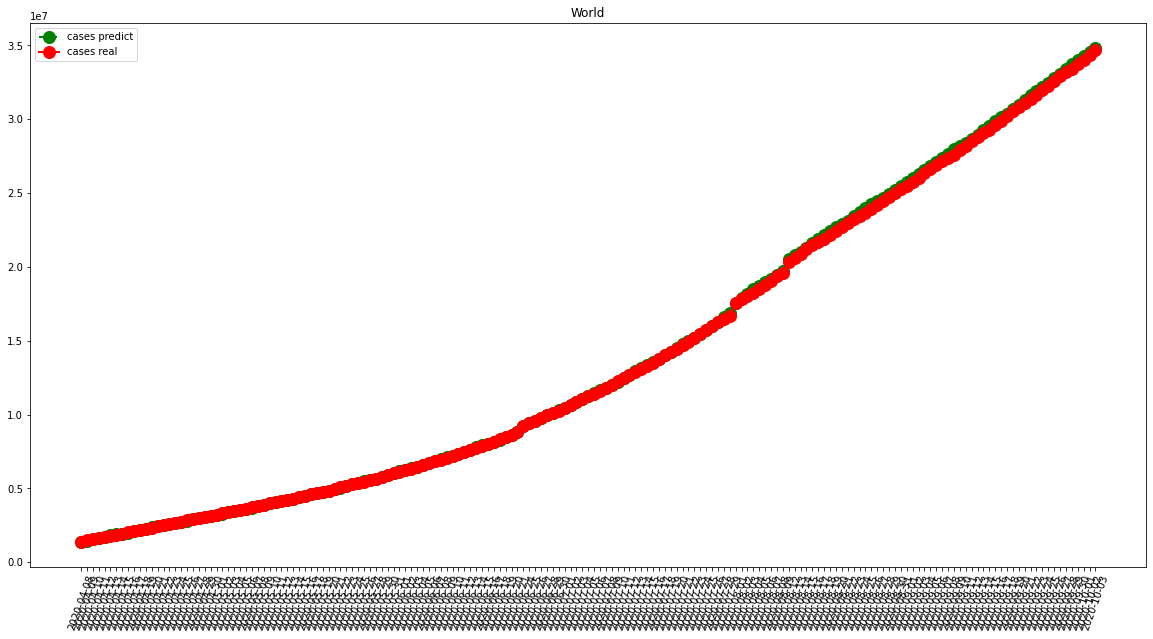

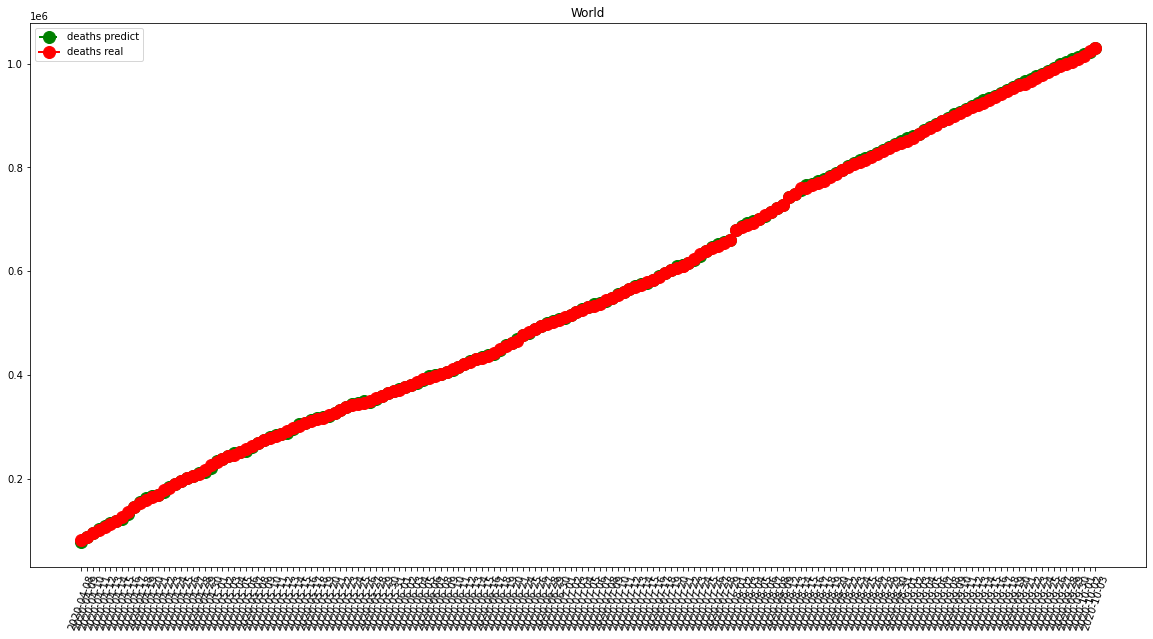

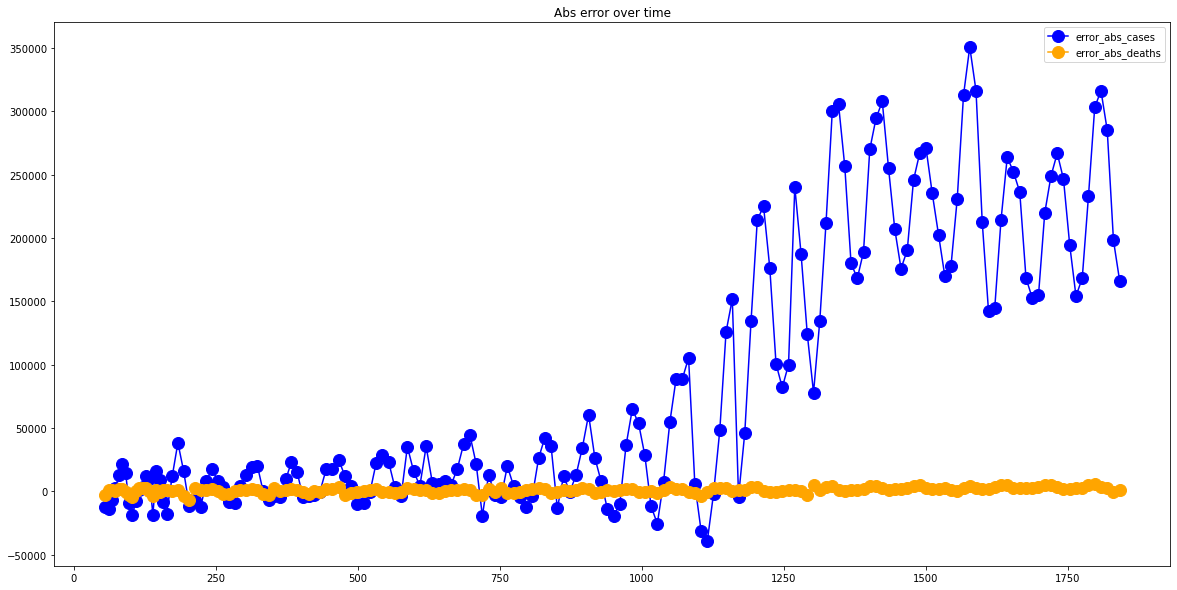

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1381.9510869565217
RMSE =  2173.202491865904
-- France performances for deaths --
MAE =  107.45652173913044
RMSE =  248.0814207157558


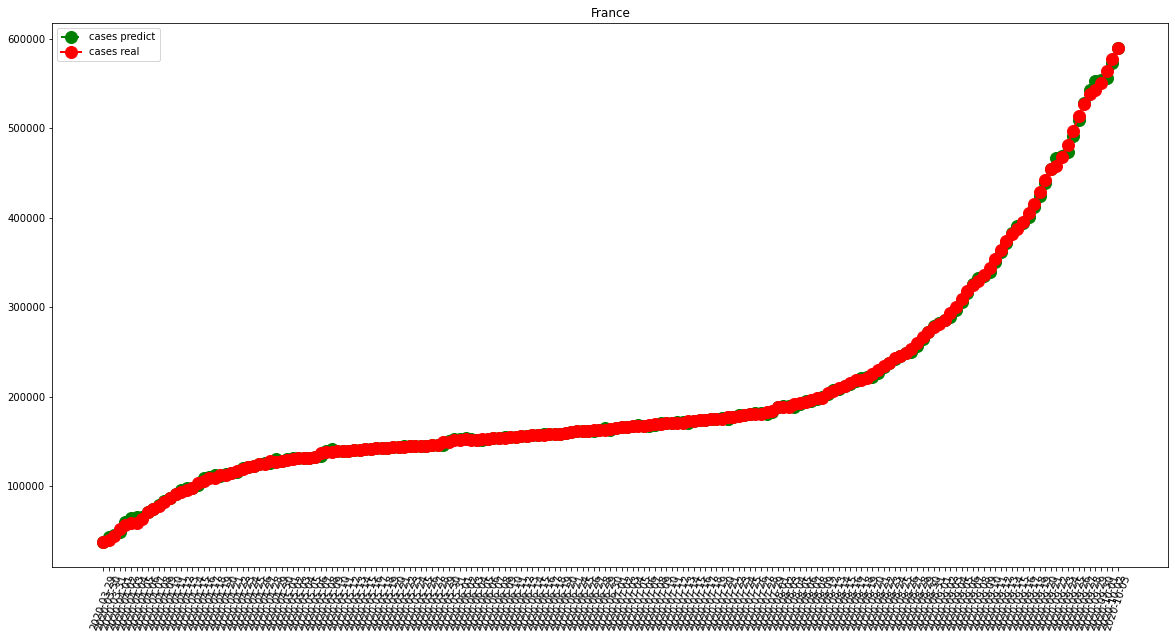

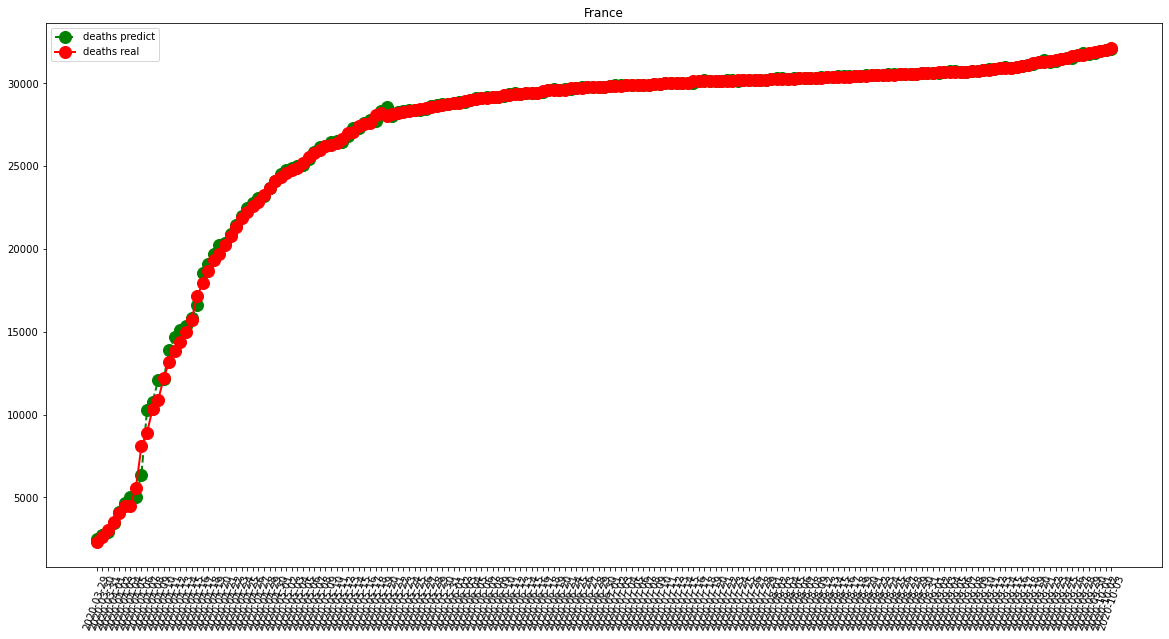

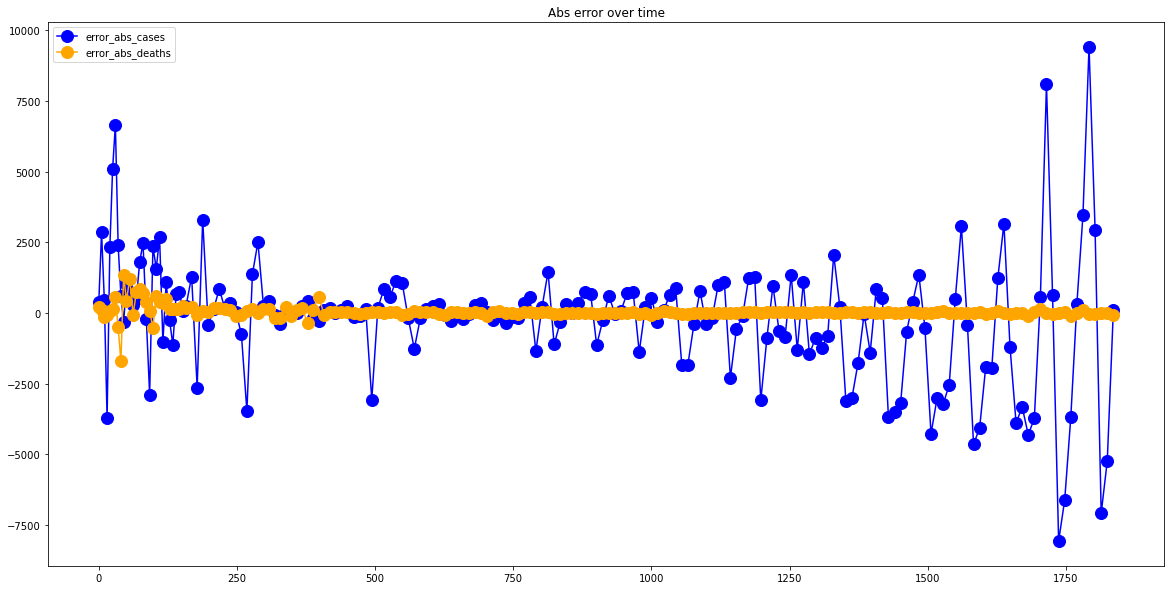

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  311.5108695652174
RMSE =  452.7238816800791
-- Italy performances for deaths --
MAE =  63.26086956521739
RMSE =  218.9451489777053


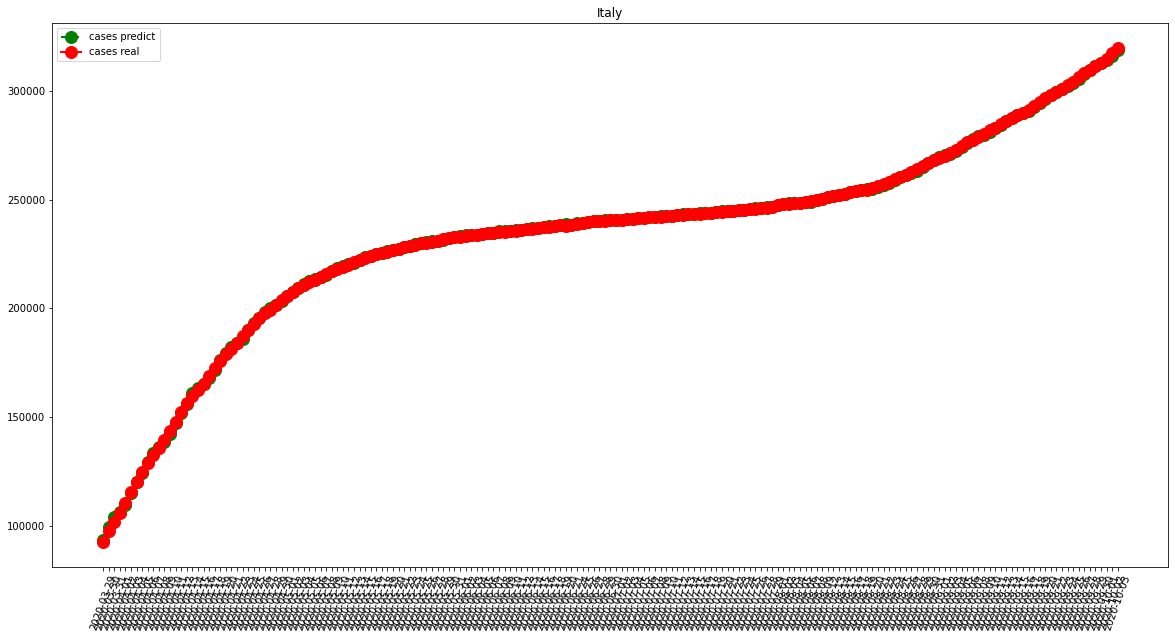

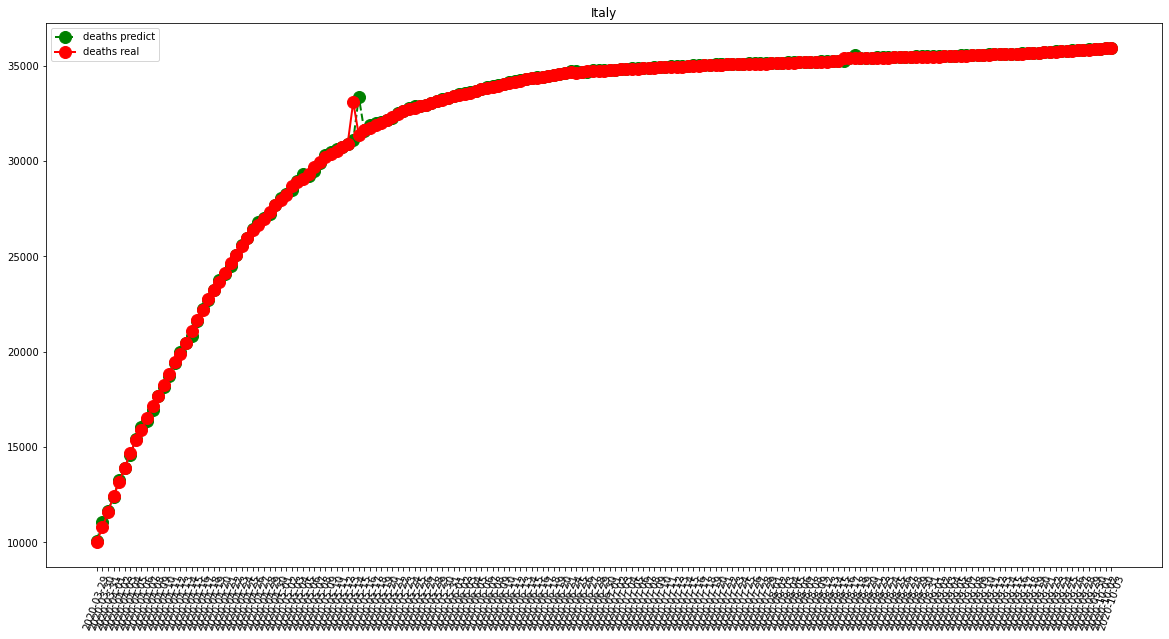

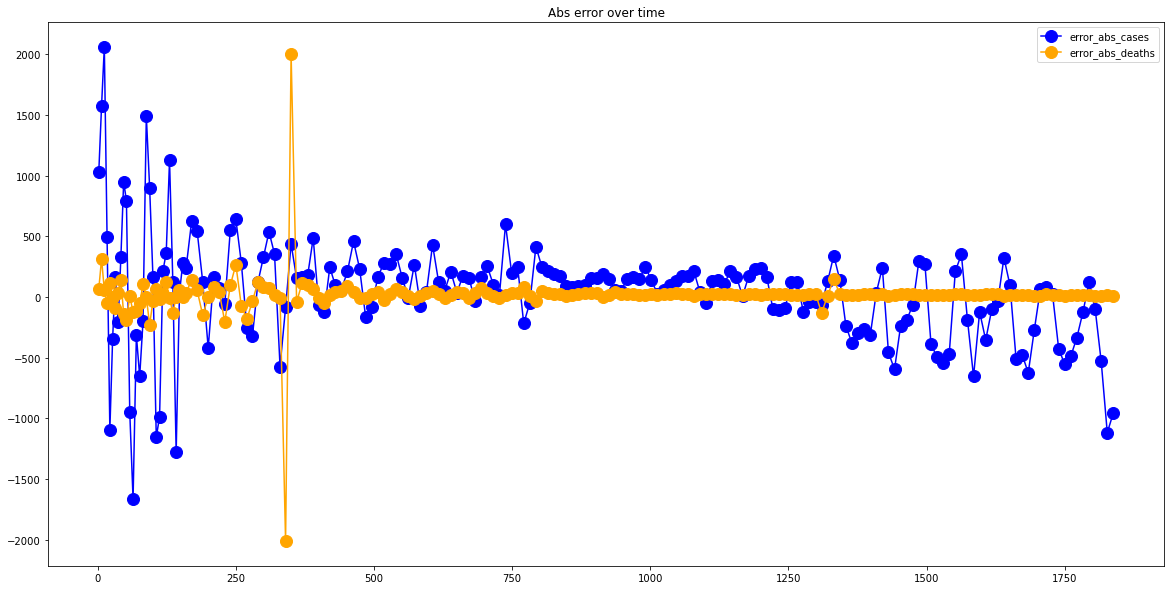

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2869.5434782608695
RMSE =  5618.5738877947215
-- Spain performances for deaths --
MAE =  118.34239130434783
RMSE =  302.43350868234336


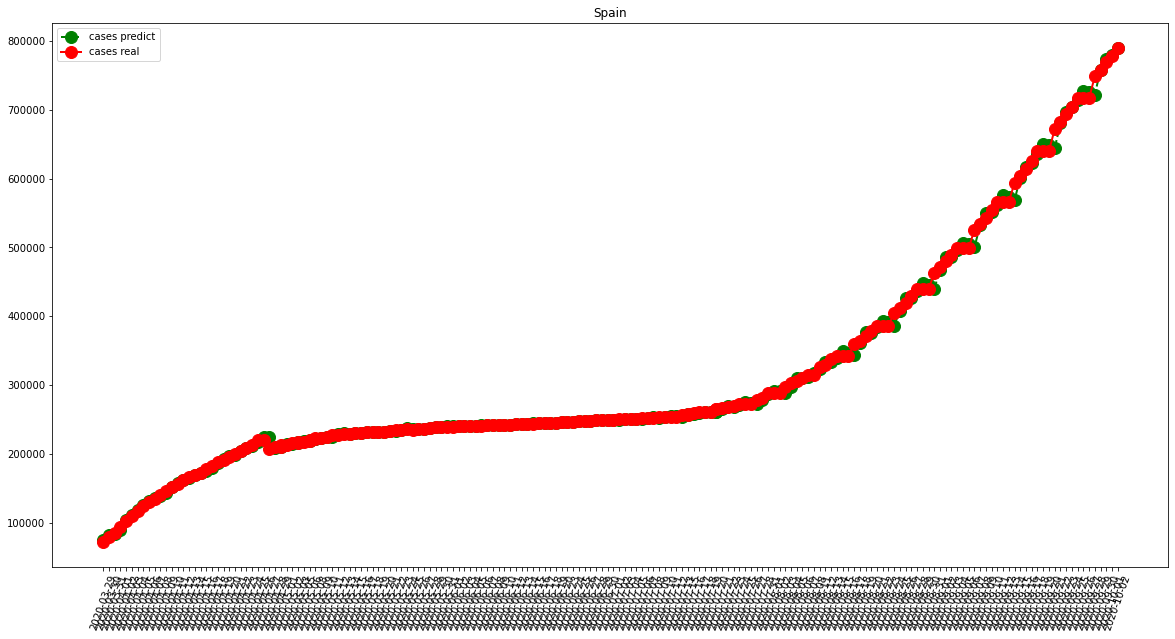

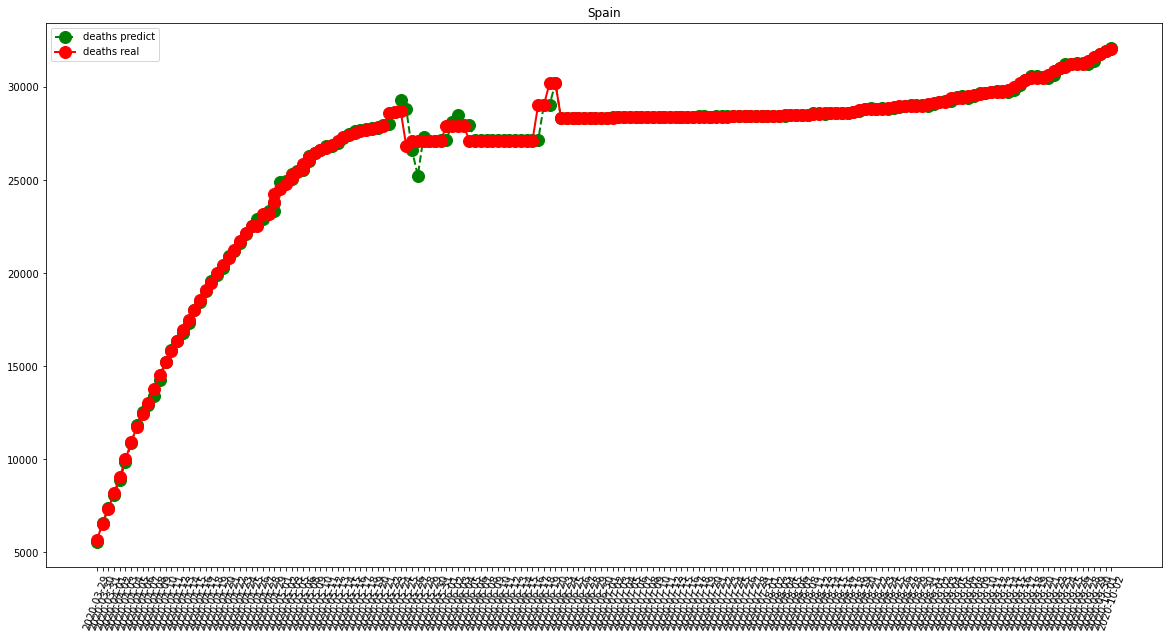

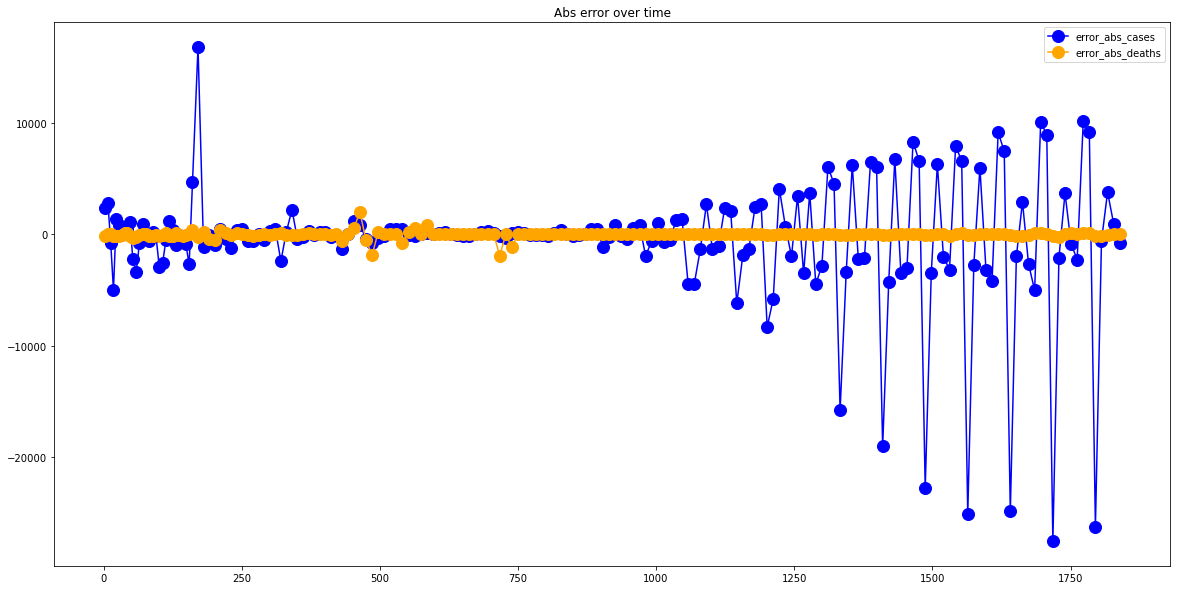

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16568.03804347826
RMSE =  23781.002512852658
-- United States performances for deaths --
MAE =  474.9347826086956
RMSE =  663.7024935918201


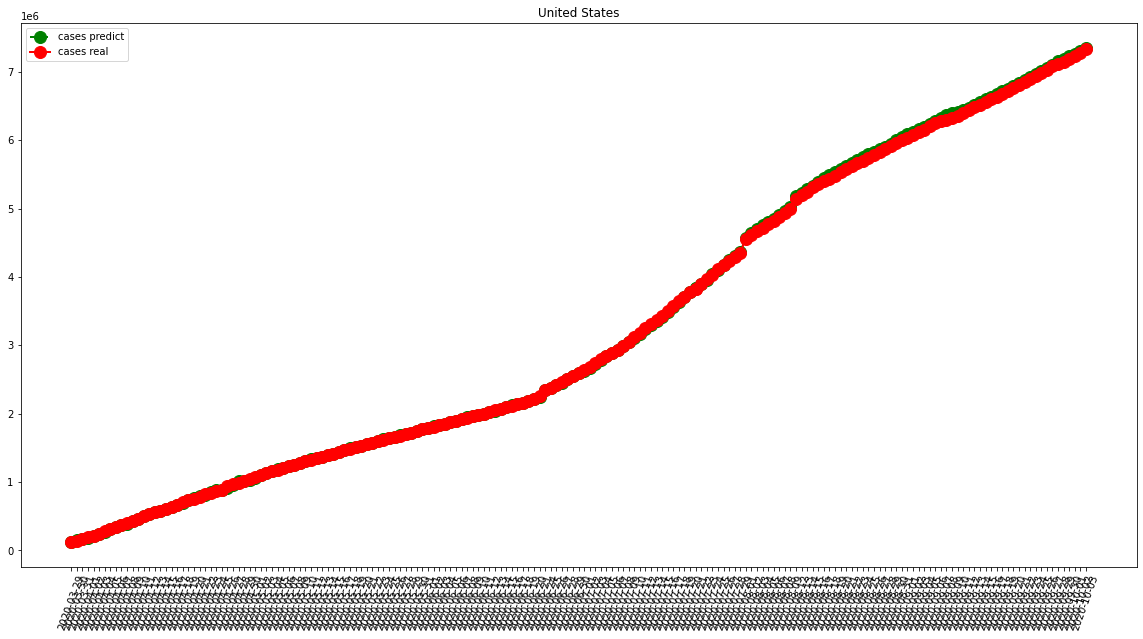

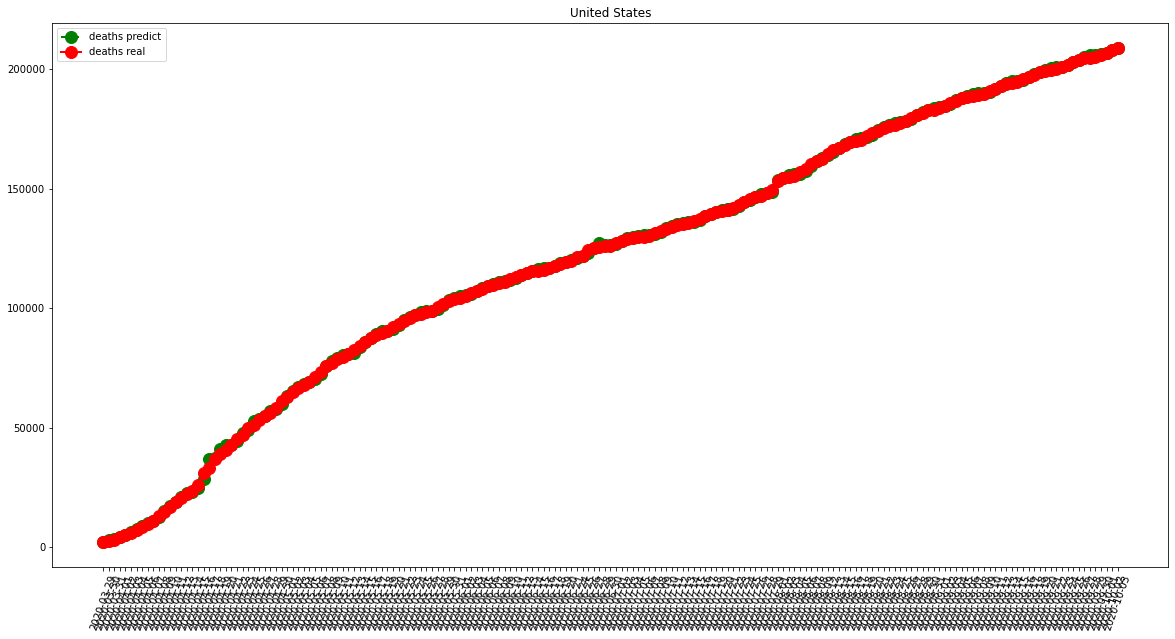

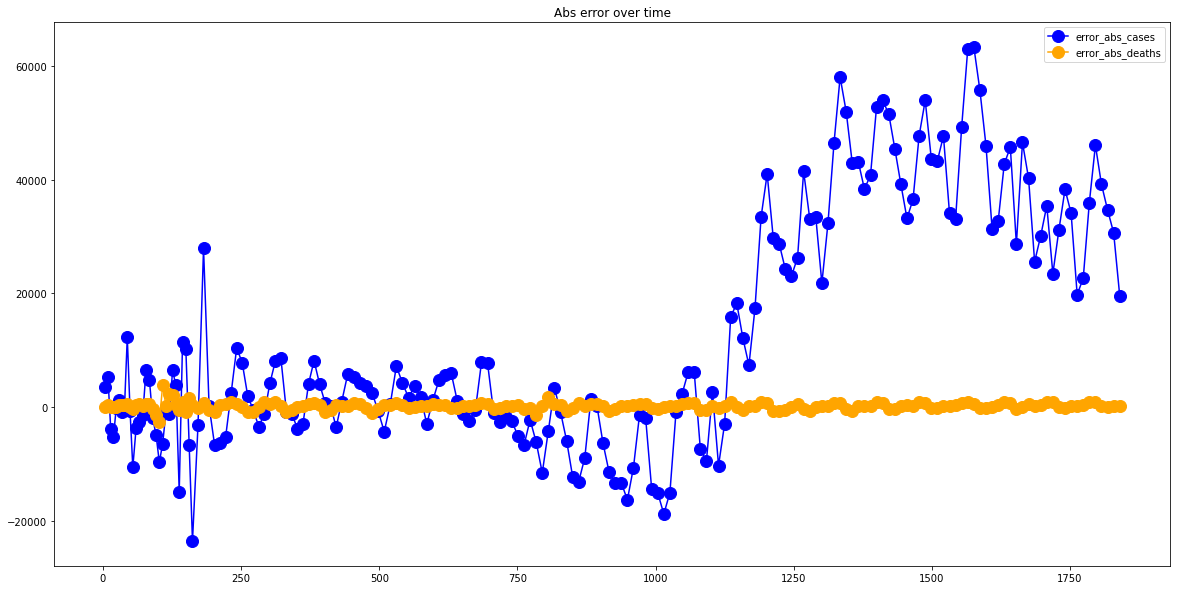

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  55.94021739130435
RMSE =  88.09015268462191
-- China performances for deaths --
MAE =  23.5
RMSE =  115.7778513773909


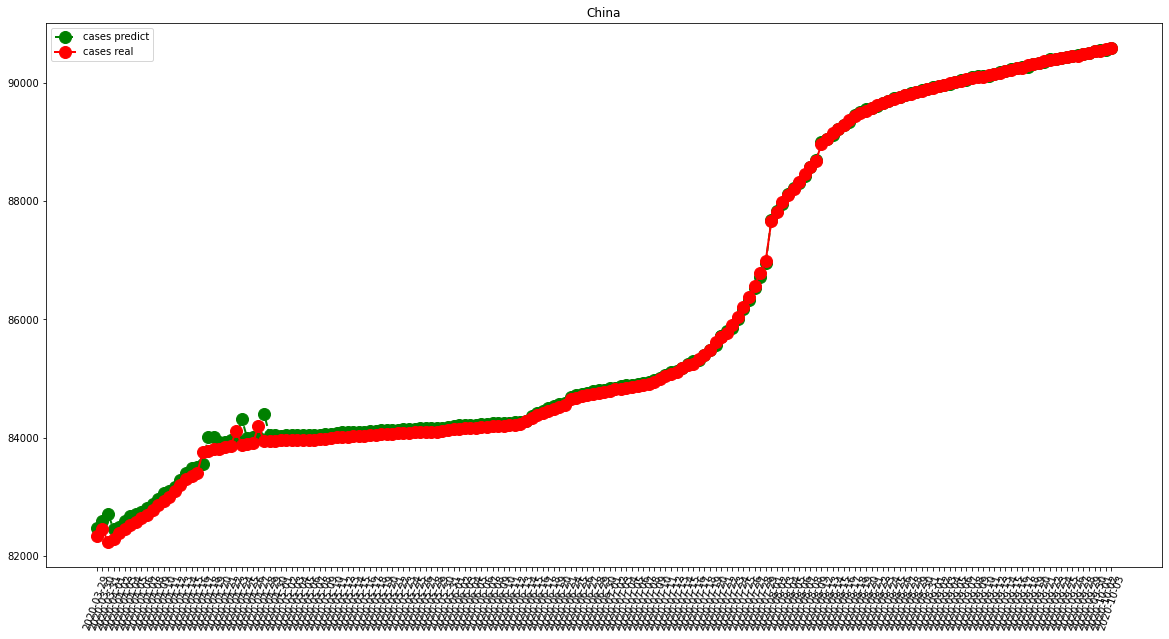

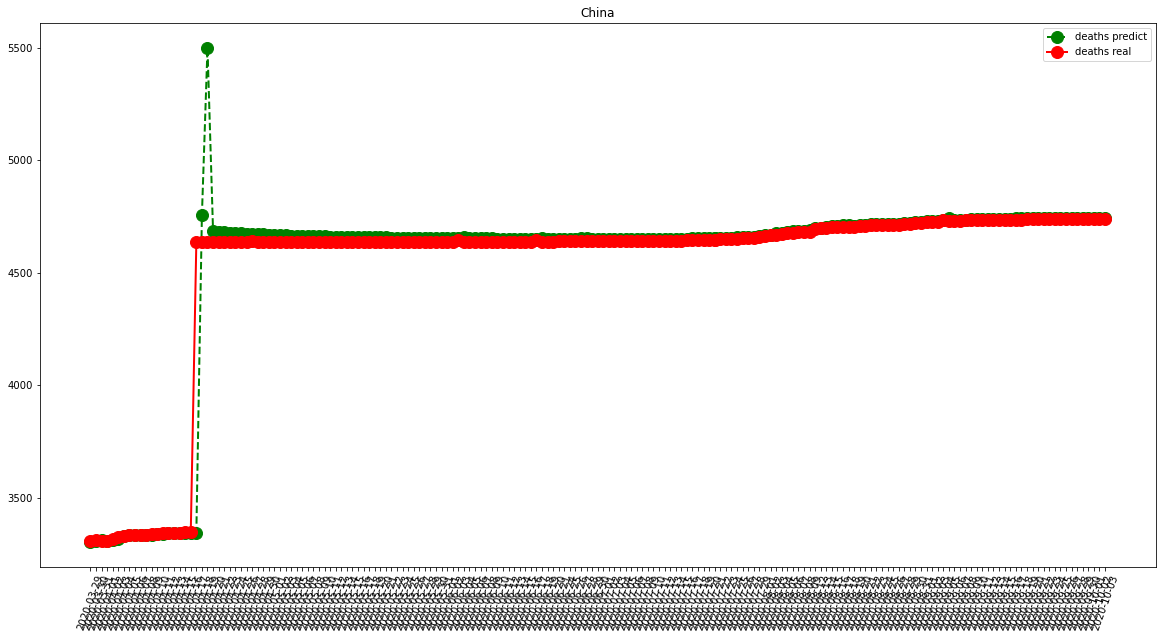

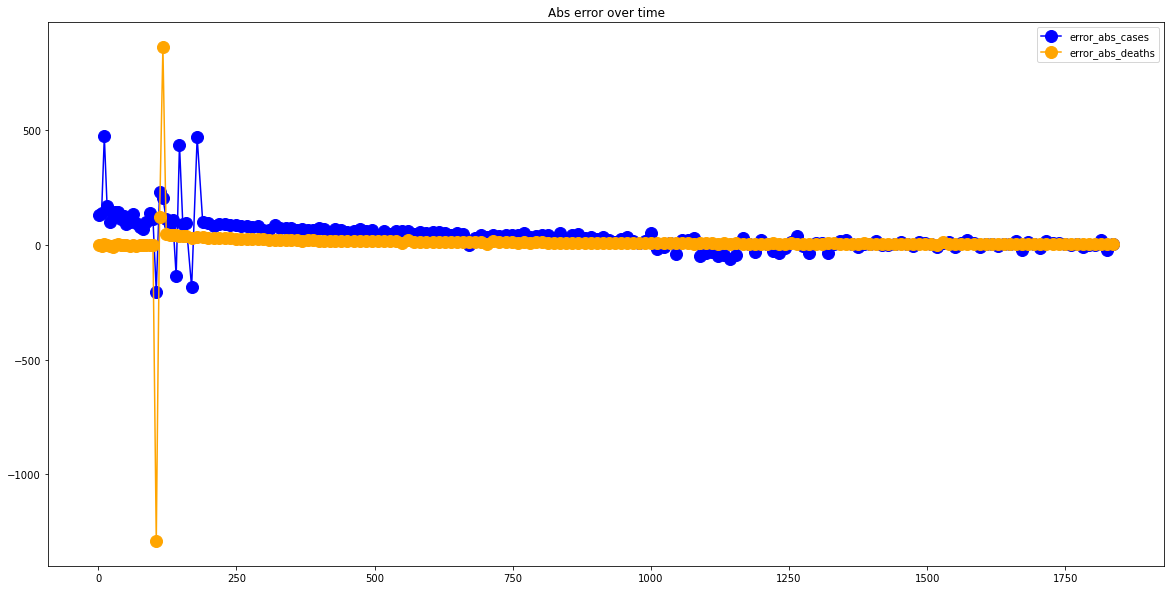

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1094.8461538461538
RMSE =  3422.5339184698996
-- United Kingdom performances for deaths --
MAE =  199.56410256410257
RMSE =  683.4113995432334


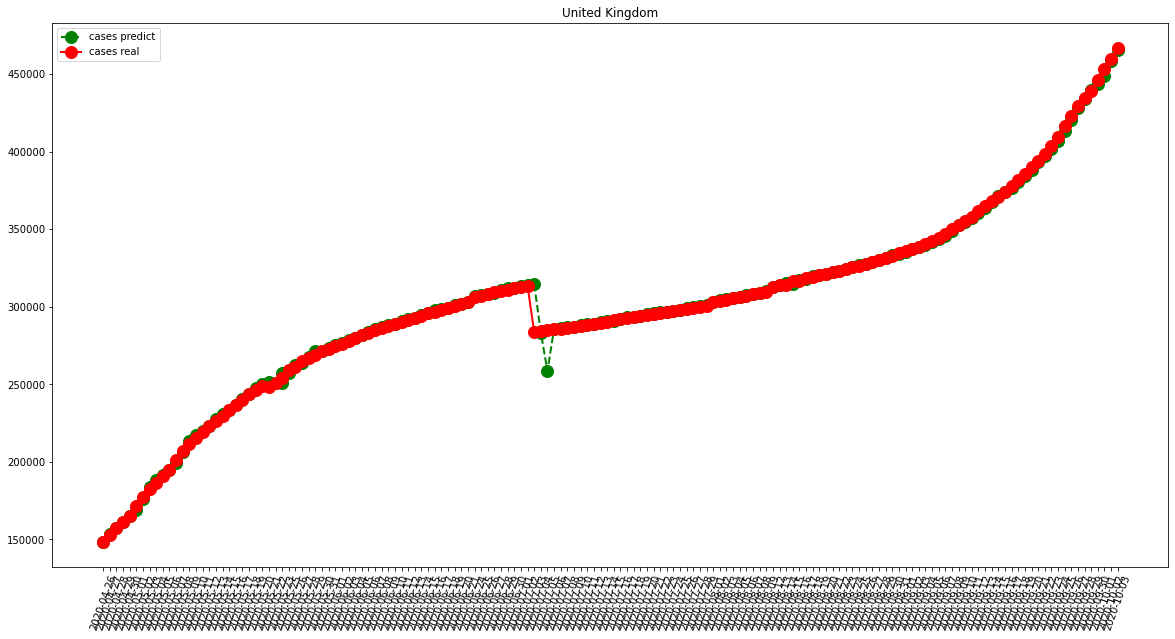

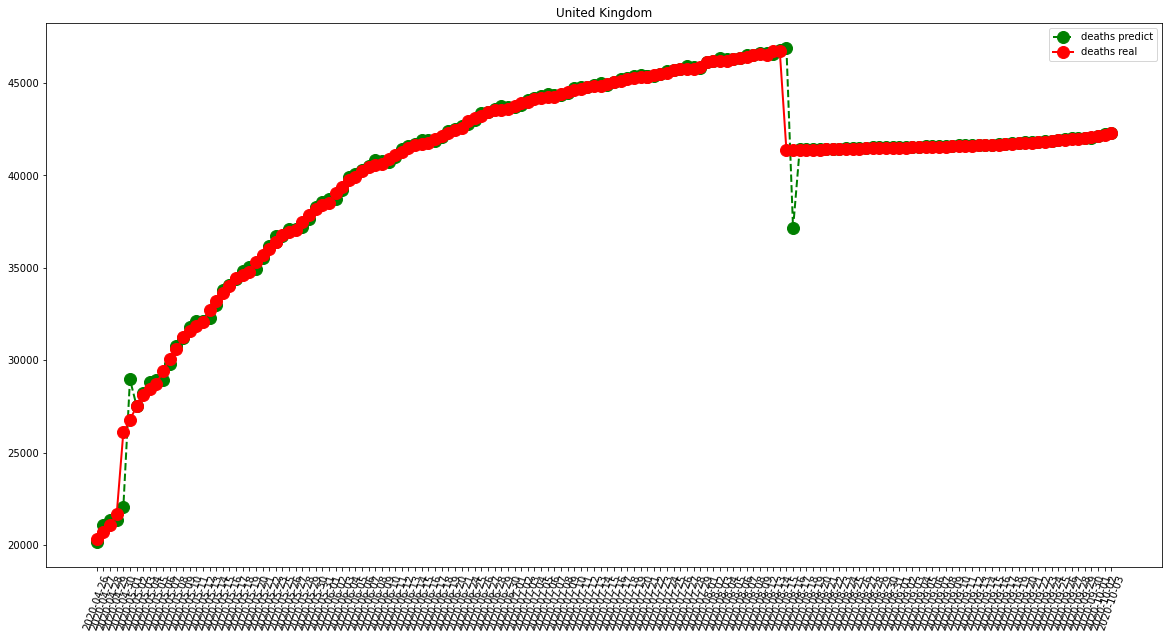

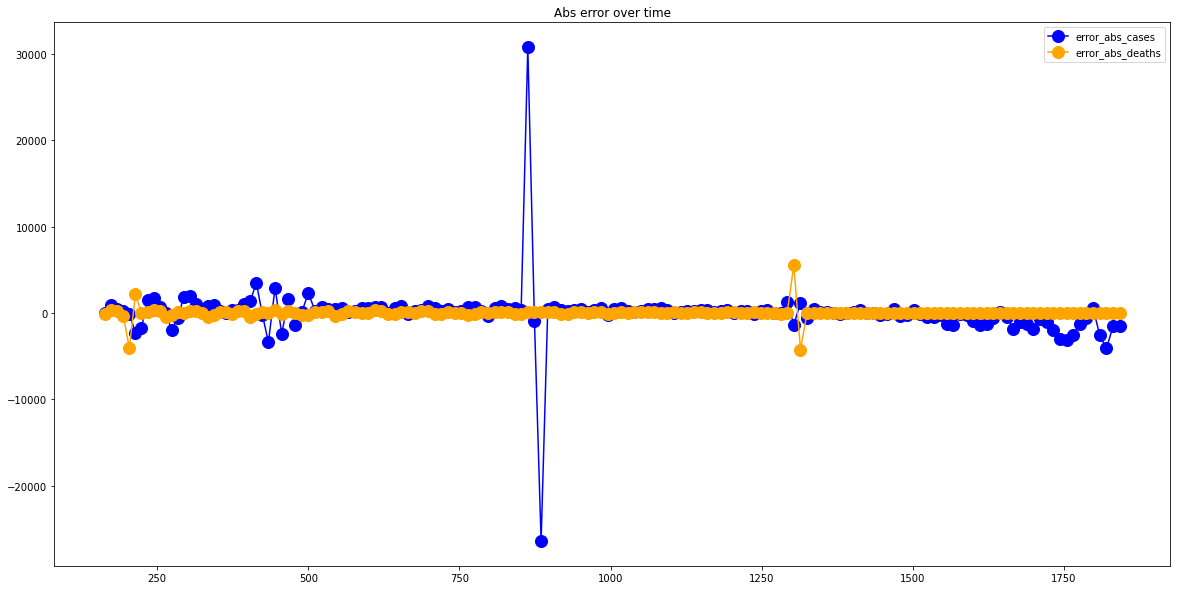

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  438.75
RMSE =  598.7417629645928
-- Germany performances for deaths --
MAE =  18.006410256410255
RMSE =  35.35162202059729


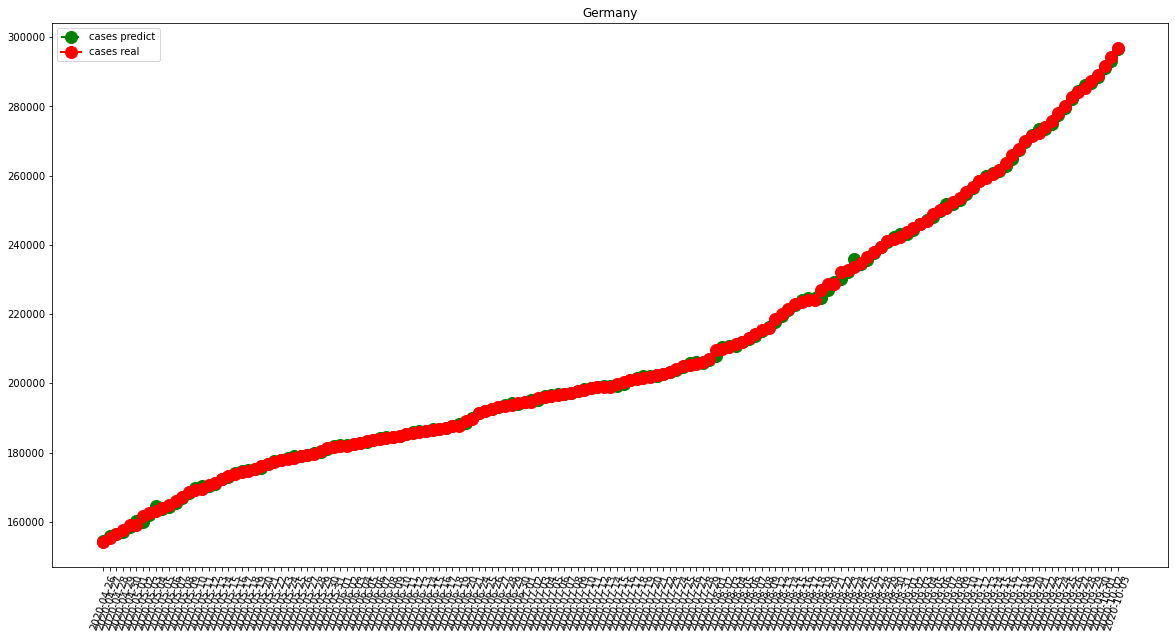

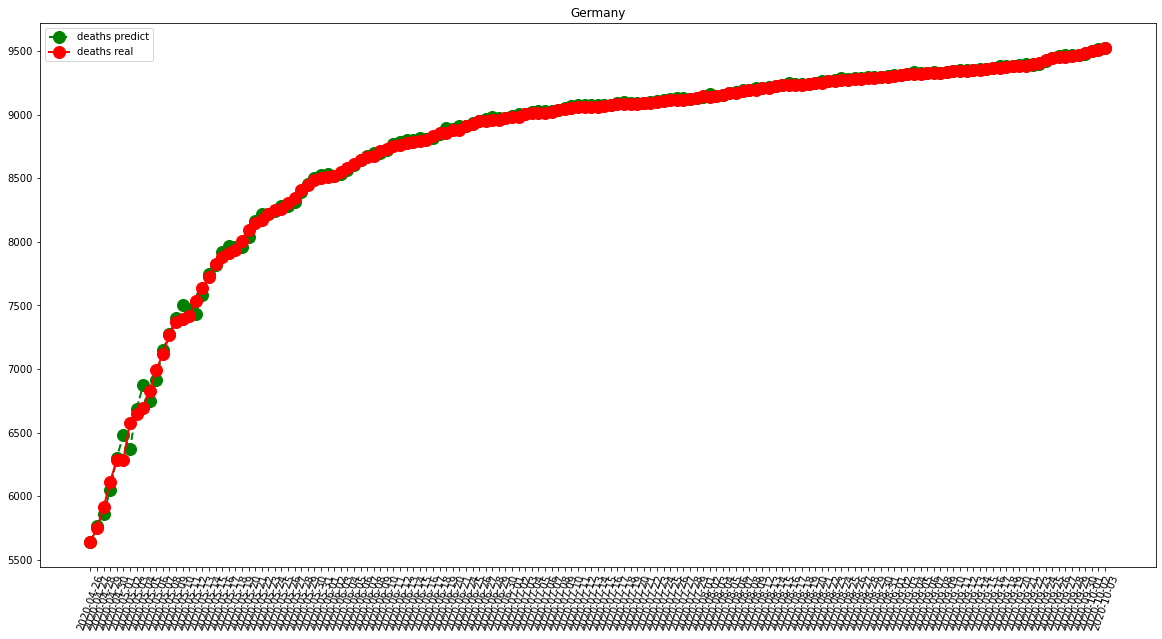

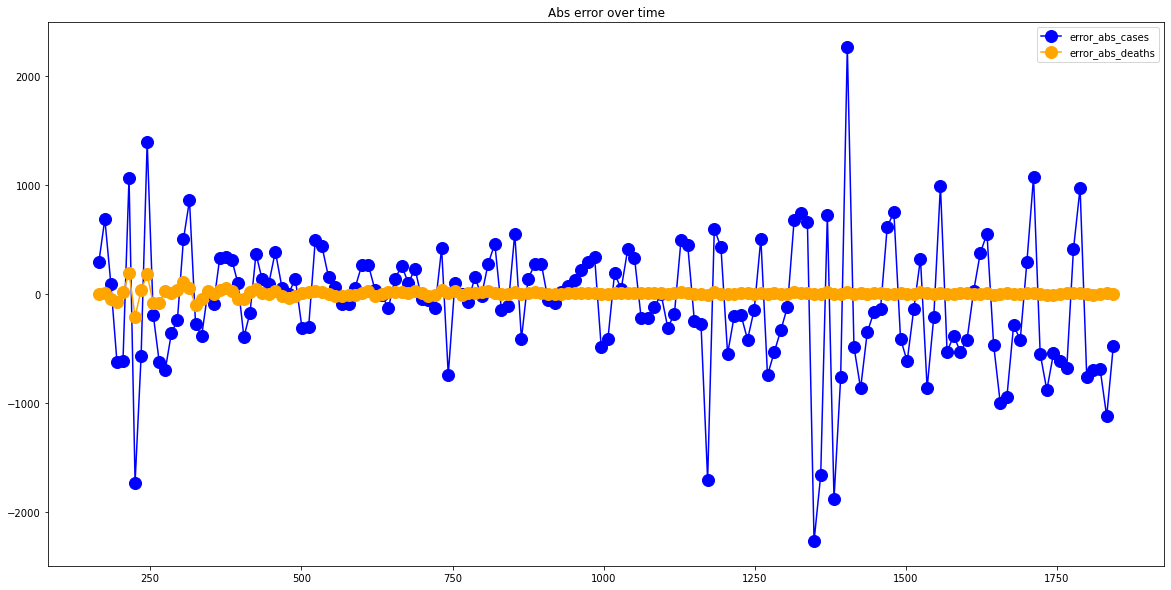

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  851.1410256410256
RMSE =  1194.517084056383
-- Iran performances for deaths --
MAE =  49.52564102564103
RMSE =  82.29076030010435


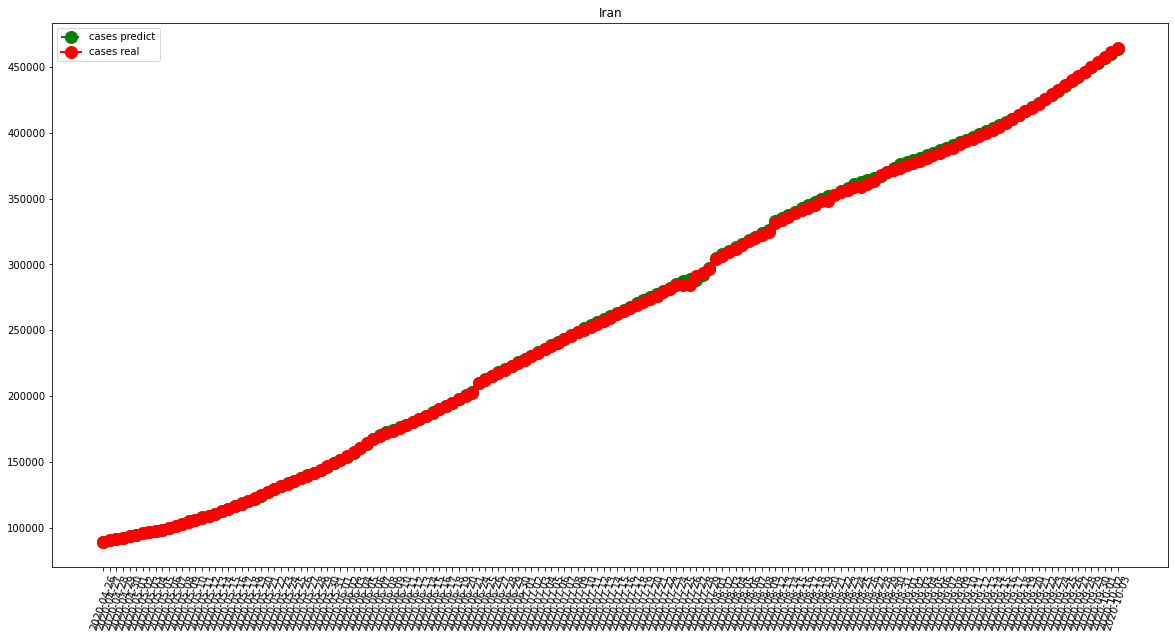

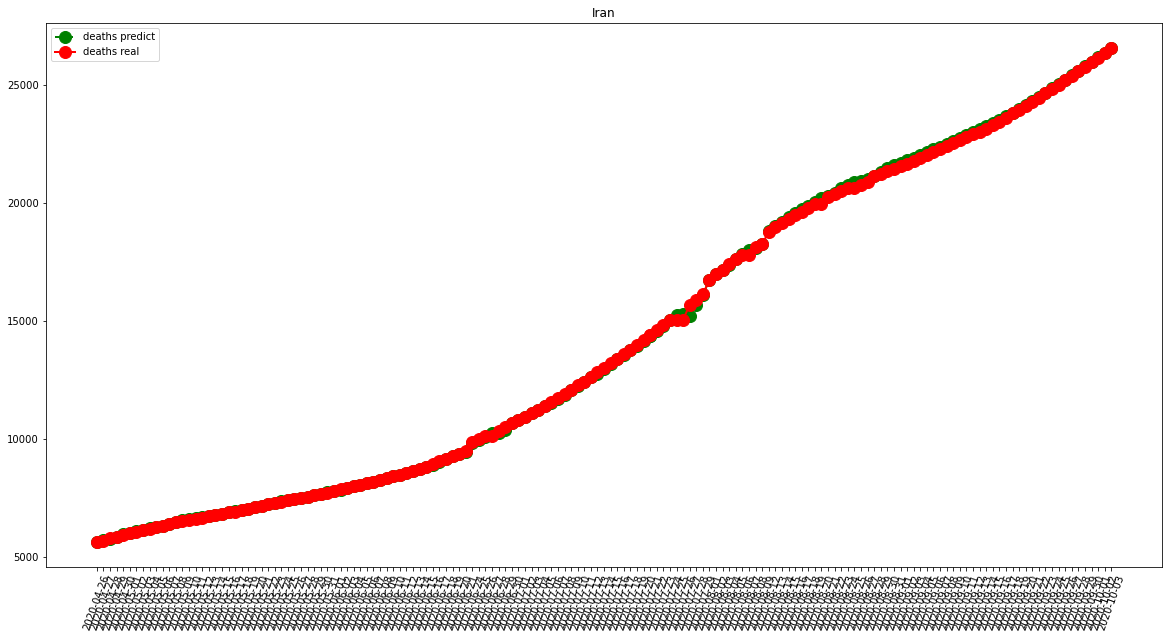

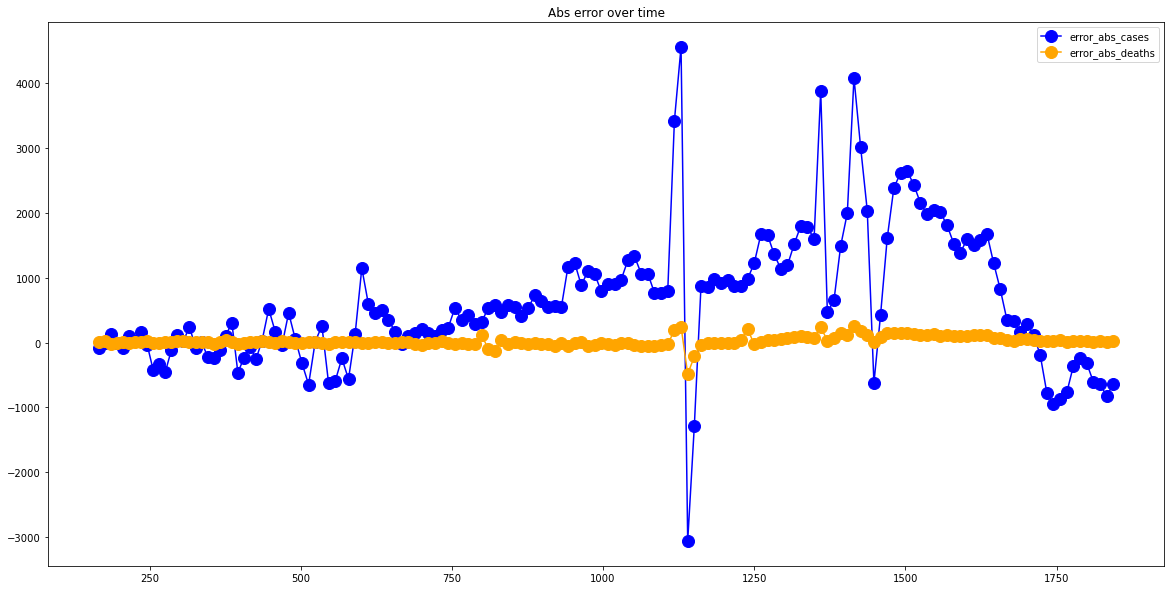

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  226.78846153846155
RMSE =  329.3605790401168
-- Turkey performances for deaths --
MAE =  15.647435897435898
RMSE =  81.56384159914403


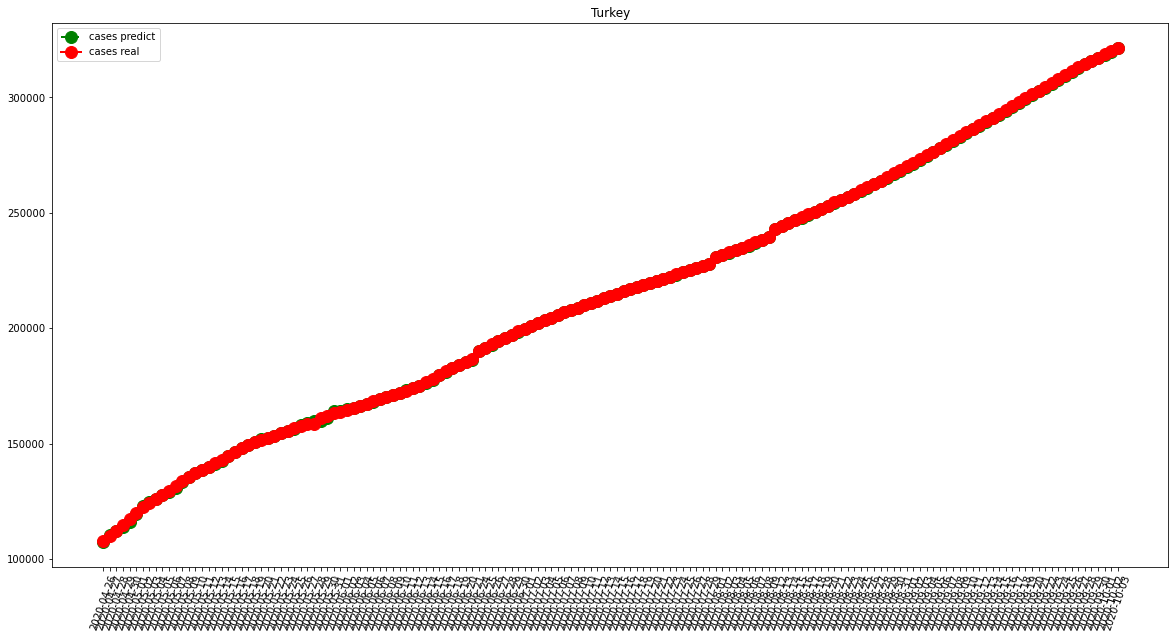

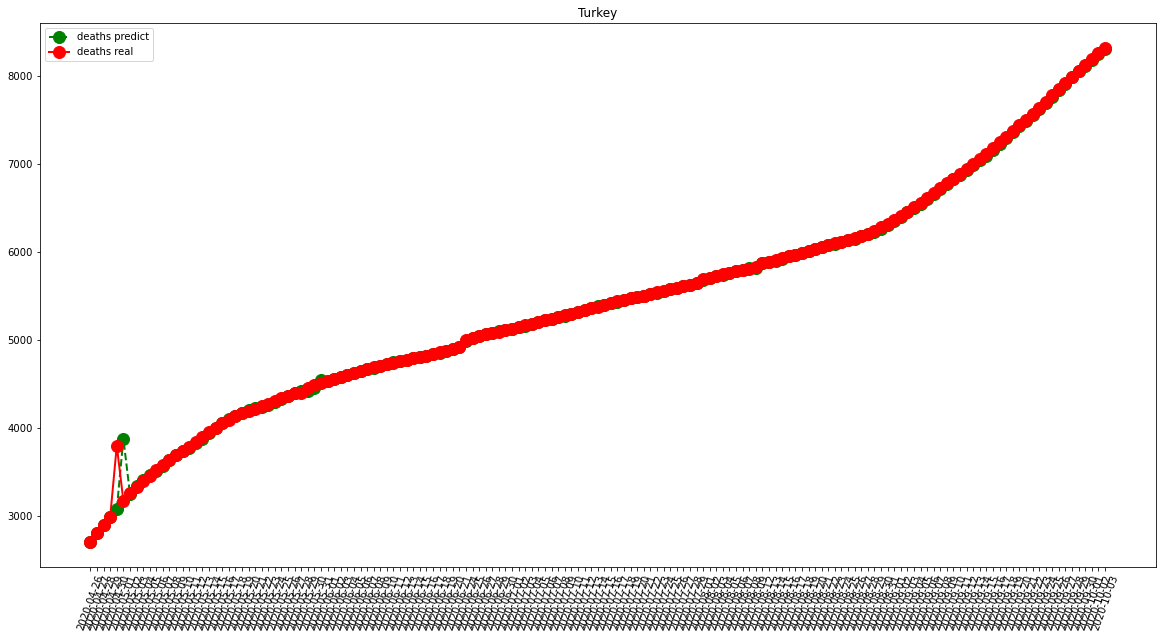

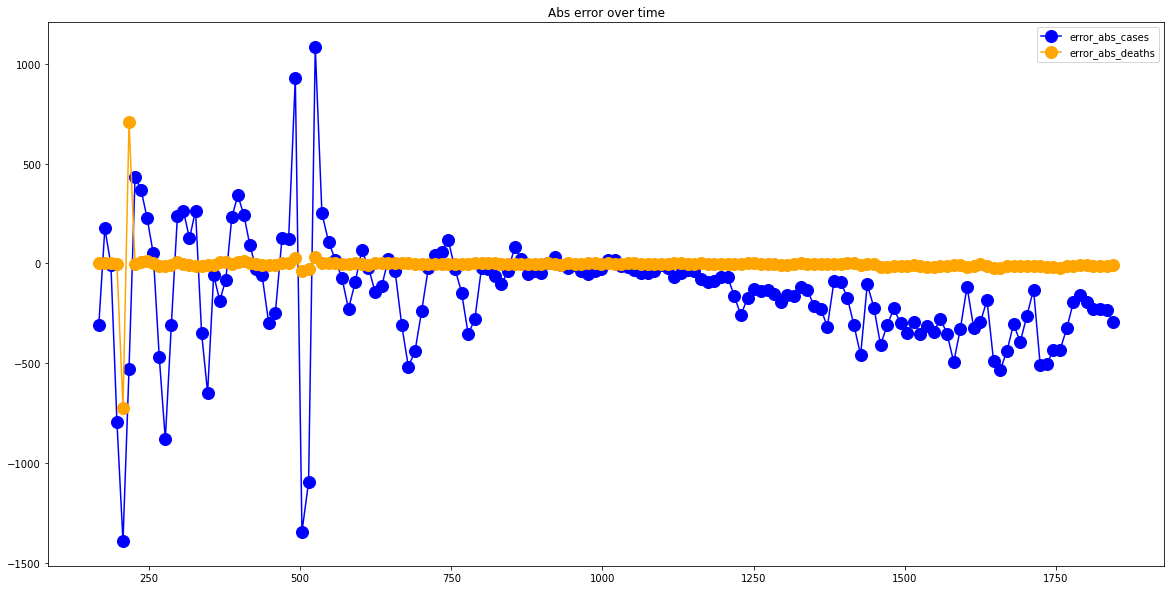

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17391.596899224805
RMSE =  22413.799485235453
-- Brazil performances for deaths --
MAE =  510.08527131782944
RMSE =  613.0366087934148


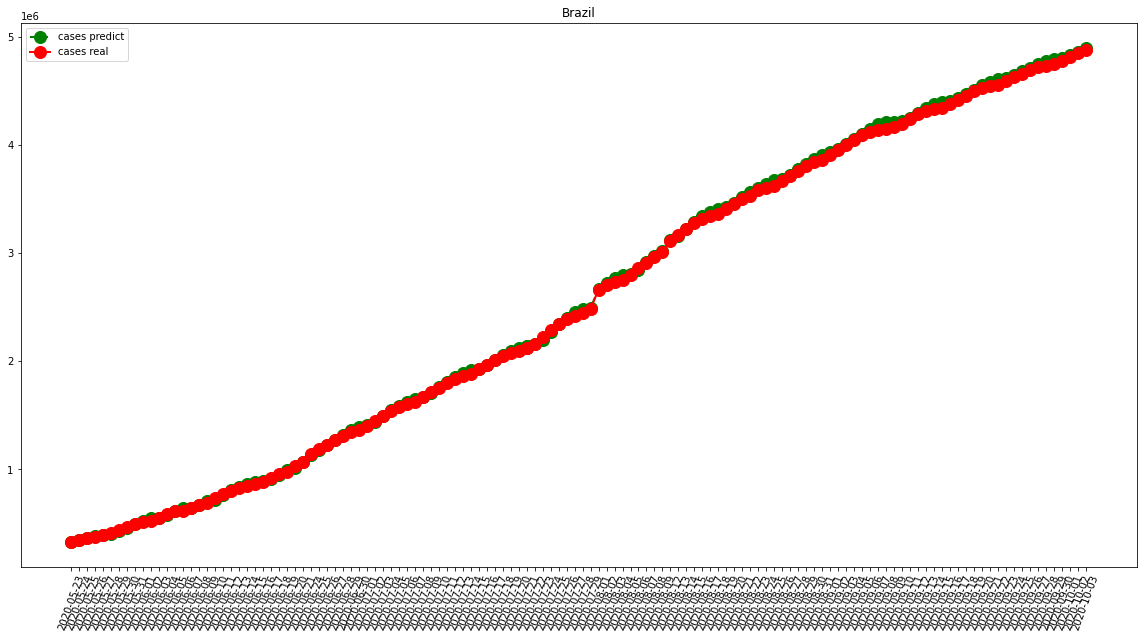

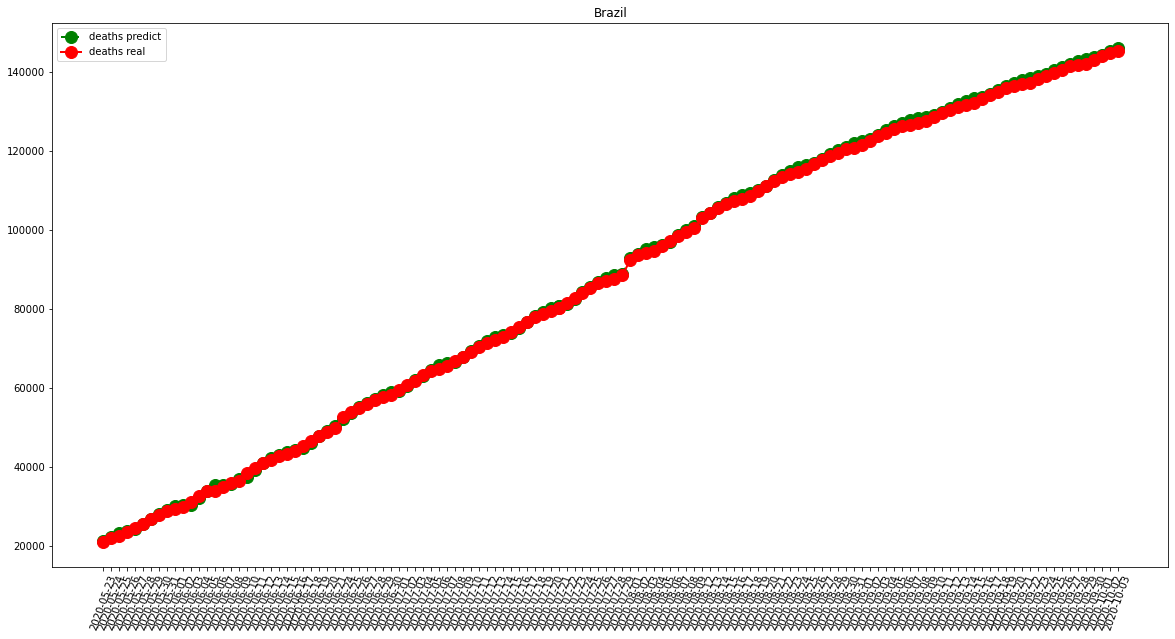

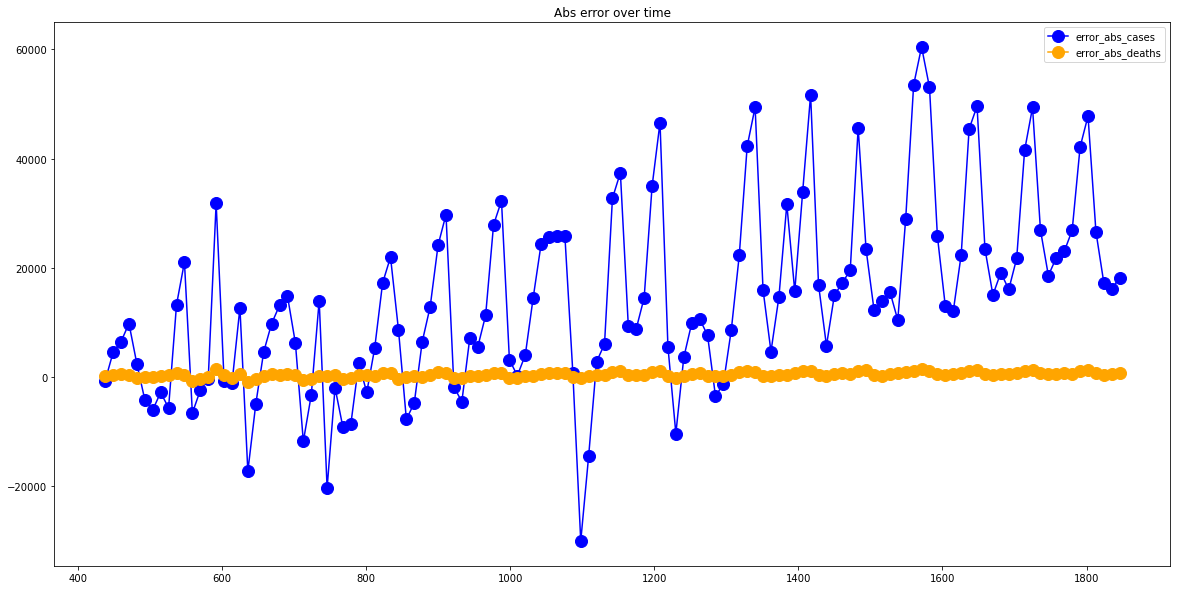

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)